In [34]:
import pandas as pd
import numpy as np
import pickle

1. Load trained model

In [35]:
with open("/content/drive/MyDrive/Infosys/Models/ridge_regressor_r2_0_979_1.pkl", "rb") as f:
    model = pickle.load(f)

2. Load Seoul Bike Dataset

In [36]:
df = pd.read_csv("/content/SeoulBikeData.csv", encoding="ISO-8859-1")

Convert Date column

In [38]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df["yr"] = df["Date"].dt.year - df["Date"].dt.year.min()   # 0 or 1
df["mnth"] = df["Date"].dt.month
df["weekday"] = df["Date"].dt.weekday

In [39]:
# Remove Date column so test data matches training structure
df = df.drop(["Date"], axis=1)

Convert Holiday + Working Day

In [40]:
df["holiday"] = df["Holiday"].map({"Holiday": 1, "No Holiday": 0})
df["workingday"] = df["Functioning Day"].map({"Yes": 1, "No": 0})

Rename columns to match model

In [41]:
df["temp"] = df["Temperature(°C)"]
df["hum"] = df["Humidity(%)"]
df["windspeed"] = df["Wind speed (m/s)"]

Convert Seasons → One-hot encoding

In [42]:
df = pd.get_dummies(df, columns=["Seasons"], drop_first=False)

Rename one-hot columns to match model

In [43]:
df.rename(columns={
    "Seasons_Autumn": "season_1",
    "Seasons_Spring": "season_2",
    "Seasons_Summer": "season_3",
    "Seasons_Winter": "season_4"
}, inplace=True)

In [44]:
for col in ["season_1", "season_2", "season_3", "season_4"]:
    if col not in df:
        df[col] = 0

In [45]:
df["weathersit"] = 1
df.loc[df["Rainfall(mm)"] > 0, "weathersit"] = 2
df.loc[df["Snowfall (cm)"] > 0, "weathersit"] = 3

Final feature order same as model

In [46]:
model_features = [
    'yr','mnth','holiday','weekday','workingday',
    'weathersit','temp','hum','windspeed',
    'season_1','season_2','season_3','season_4'
]

X = df[model_features]

 Prediction using model

In [47]:
df["Predicted_Rentals"] = model.predict(X.values)

Save the output

In [48]:
df.to_csv("Seoul_predictions.csv", index=False)

print("Prediction file created: Seoul_predictions.csv")

Prediction file created: Seoul_predictions.csv


In [49]:
pd.read_csv("Seoul_predictions.csv").head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,workingday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit,Predicted_Rentals
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,1,-5.2,37,2.2,False,False,False,True,1,148.940266
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,1,-5.5,38,0.8,False,False,False,True,1,144.908834
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,1,-6.0,39,1.0,False,False,False,True,1,147.754136
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,1,-6.2,40,0.9,False,False,False,True,1,148.894475
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,1,-6.0,36,2.3,False,False,False,True,1,149.383066


Final Output with ONLY 3 Columns

In [51]:
df = df[["Rented Bike Count", "Predicted_Rentals"]]

In [52]:
df = df.rename(columns={
    "Rented Bike Count": "Actual_Rentals"
})

In [53]:
df.to_csv("Final_Actual_vs_Predicted.csv", index=False)

print("Created file: Final_Actual_vs_Predicted.csv")

Created file: Final_Actual_vs_Predicted.csv


In [54]:
pd.read_csv("Final_Actual_vs_Predicted.csv").head()

,Actual_Rentals,Predicted_Rentals
0,254,148.940266
1,204,144.908834
2,173,147.754136
3,107,148.894475
4,78,149.383066


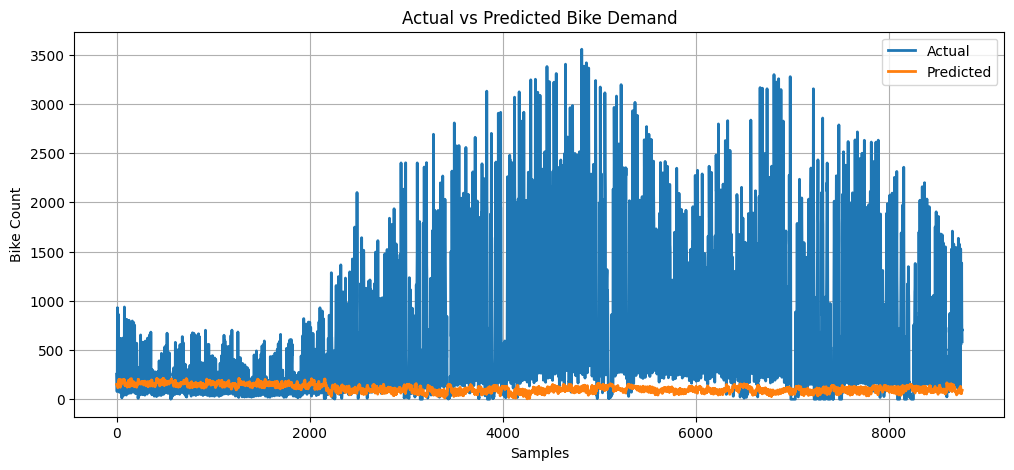

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your predictions file
df = pd.read_csv("Final_Actual_vs_Predicted.csv")

# Extract actual and predicted columns
y_test = df["Actual_Rentals"]
y_pred = df["Predicted_Rentals"]

plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred.values, label='Predicted', linewidth=2)
plt.title("Actual vs Predicted Bike Demand")
plt.xlabel("Samples")
plt.ylabel("Bike Count")
plt.legend()
plt.grid(True)
plt.show()